# Fiber Design

**Scott Prahl**

**27 Feb 2018, Version 2**

In [2]:
import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt

import ofiber as of

# Designing a fiber for zero dispersion

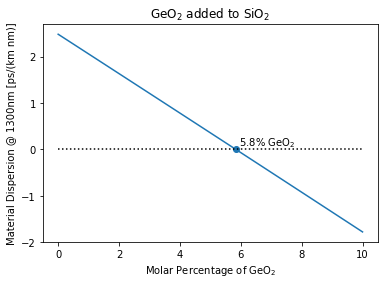

In [24]:
def smfconc(x):
    glass = of.doped_glass(x)
    return  of.Material_Dispersion(glass,1300e-9)   # s/m**2

x = np.linspace(0,0.1,50)
M = np.empty_like(x)
for i in range(len(x)):
    glass = of.doped_glass(x[i])
    M[i]  = of.Material_Dispersion(glass,1300e-9)   # s/m**2
M *= 1e6                                             # ps/(km nm)
plt.plot(x*100,M)
plt.plot([0,10],[0,0],':k')


xx = scipy.optimize.brentq(smfconc,0,0.1)
plt.scatter([xx*100],[smfconc(xx)])
plt.annotate(' %.1f%% GeO$_2$'%(xx*100), xy=(xx*100,0),va='bottom')
plt.xlabel("Molar Percentage of GeO$_2$")
plt.ylabel("Material Dispersion @ 1300nm [ps/(km nm)]")
plt.title('GeO$_2$ added to SiO$_2$')
plt.show()

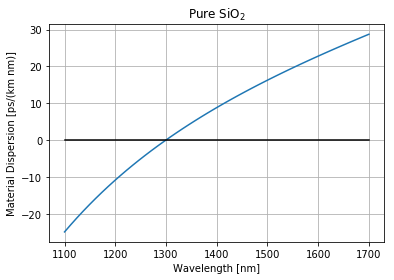

In [25]:
lambda0 = np.linspace(1.1,1.7,50)*1e-6

x = 0.058
glass = of.doped_glass(x)

M  = of.Material_Dispersion(glass,lambda0) # s/m**2
M *= 1e6                                               # ps/(km nm)

plt.plot(lambda0*1e9,M)
plt.plot([1100,1700],[0,0],'k')
plt.xlabel("Wavelength [nm]")
plt.ylabel("Material Dispersion [ps/(km nm)]")
plt.title('Pure SiO$_2$')
plt.grid('on')
plt.show()

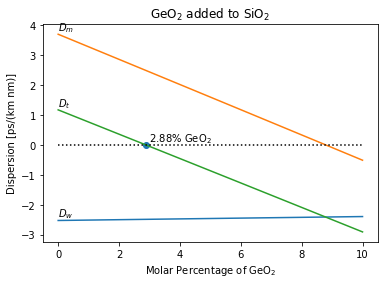

In [29]:
def dt_mixture(x, *args):
    """
    Returns total dispersion for (x)GeO2:(1-x)SiO2 glass 

    wrapper function for use with brentq()
    """
    a = args[0]
    Delta = args[1]
    lambda0 = args[2]
    glass = of.doped_glass(x)
    return of.Total_Dispersion(glass,Delta,a,lambda0)

Delta = 0.0036
a=4.1e-6 #m
design_lambda = 1313e-9

x = np.linspace(0,0.1,50)
Dm = np.empty_like(x)
Dw = np.empty_like(x)
for i in range(len(x)):
    glass = of.doped_glass(x[i])
    Dm[i] = of.Material_Dispersion(glass,design_lambda)     # s/m**2
    Dw[i] = of.Waveguide_Dispersion_Delta(glass,Delta,a,design_lambda)# s/m**2
    
Dm *= 1e6                                                        # ps/(km nm)
Dw *= 1e6                                                        # ps/(km nm)

# plot waveguide, material, and total dispersion
plt.plot(x*100,Dw)
plt.annotate('$D_w$', xy=(0,Dw[0]),va='bottom')

plt.plot(x*100,Dm)
plt.annotate('$D_m$', xy=(0,Dm[0]),va='bottom')

plt.plot(x*100,Dm+Dw)
plt.annotate('$D_t$', xy=(0,Dw[0]+Dm[0]),va='bottom')

plt.plot([0,10],[0,0],':k')

# find and label the zero dispersion concentration
xx = scipy.optimize.brentq(dt_mixture,0,0.1,args=(a,Delta,design_lambda))
Dtxx = dt_mixture(xx,a,Delta,design_lambda)
plt.scatter([xx*100],[Dtxx])
plt.annotate(' %.2f%% GeO$_2$'%(xx*100), xy=(xx*100,Dtxx),va='bottom')

plt.xlabel("Molar Percentage of GeO$_2$")
plt.ylabel("Dispersion [ps/(km nm)]")
plt.title('GeO$_2$ added to SiO$_2$')
plt.show()

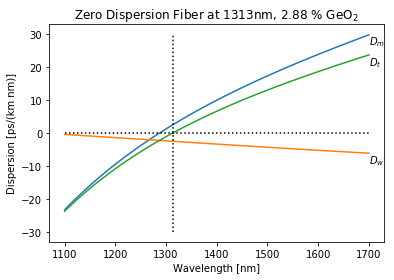

In [27]:
a=4.1e-6
x = 0.02882
Delta = 0.0036

lambda0 = np.linspace(1.1,1.7,50)*1e-6
glass = of.doped_glass(x)

Dm = of.Material_Dispersion(glass,lambda0)      # s/m**2
Dw = of.Waveguide_Dispersion_Delta(glass,Delta,a,lambda0) # s/m**2

Dm *= 1e6                                              # ps/(km nm)
Dw *= 1e6                                              # ps/(km nm)
Dt = Dm+Dw

plt.plot(lambda0*1e9,Dm)
plt.plot(lambda0*1e9,Dw)
plt.plot(lambda0*1e9,Dt)

plt.annotate('$D_w$', xy=(1700,Dw[-1]),va='top')
plt.annotate('$D_m$', xy=(1700,Dm[-1]),va='top')
plt.annotate('$D_t$', xy=(1700,Dw[-1]+Dm[-1]),va='top')

plt.plot([1313,1313],[-30,30],':k')
plt.plot([1100,1700],[0,0],':k')

plt.xlabel("Wavelength [nm]")
plt.ylabel("Dispersion [ps/(km nm)]")
plt.title('Zero Dispersion Fiber at 1313nm, %.2f %% GeO$_2$'%(x*100))
plt.show()